## Multilayer Perceptron (MLP) – Breast Cancer Wisconsin Dataset

Author: Aryan Singh Sisodia  
Objective: Implement and analyze Logistic Regression for linearly separable data.


## 📌 Project Objective

The objective of this project is to build a Logistic Regression model to classify breast tumors as malignant or benign using clinical measurement features.

Early detection of malignant tumors is critical in medical diagnosis. 
This model demonstrates how machine learning can assist in predictive healthcare analytics.


## 📊 Dataset Overview

Dataset: Breast Cancer Wisconsin Dataset  
Source: scikit-learn built-in dataset  

Features:
- Mean radius
- Texture
- Perimeter
- Area
- Smoothness
- And other tumor-related measurements

Target:
- 0 → Malignant
- 1 → Benign


### 1. Setup and Data Loading

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

df = X.copy()
df['target'] = y.iloc[:, 0]

print(df.head())


   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  texture3  \
0      0.3001          0.14710     0.2419             0.07871  ...     17.33   
1      0.0869          0.07017     0.1812             0.05667  ...     23.41   
2      0.1974          0.12790     0.2069             0.05999  ...     25.53   
3      0.2414          0.10520     0.2597             0.09744  ...     26.50   
4      0.1980          0.10430     0.1809             0.05883  ...     16.67   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.

### 2. Data Exploration

          radius1    texture1  perimeter1        area1  smoothness1  \
count  569.000000  569.000000  569.000000   569.000000   569.000000   
mean    14.127292   19.289649   91.969033   654.889104     0.096360   
std      3.524049    4.301036   24.298981   351.914129     0.014064   
min      6.981000    9.710000   43.790000   143.500000     0.052630   
25%     11.700000   16.170000   75.170000   420.300000     0.086370   
50%     13.370000   18.840000   86.240000   551.100000     0.095870   
75%     15.780000   21.800000  104.100000   782.700000     0.105300   
max     28.110000   39.280000  188.500000  2501.000000     0.163400   

       compactness1  concavity1  concave_points1   symmetry1  \
count    569.000000  569.000000       569.000000  569.000000   
mean       0.104341    0.088799         0.048919    0.181162   
std        0.052813    0.079720         0.038803    0.027414   
min        0.019380    0.000000         0.000000    0.106000   
25%        0.064920    0.029560         

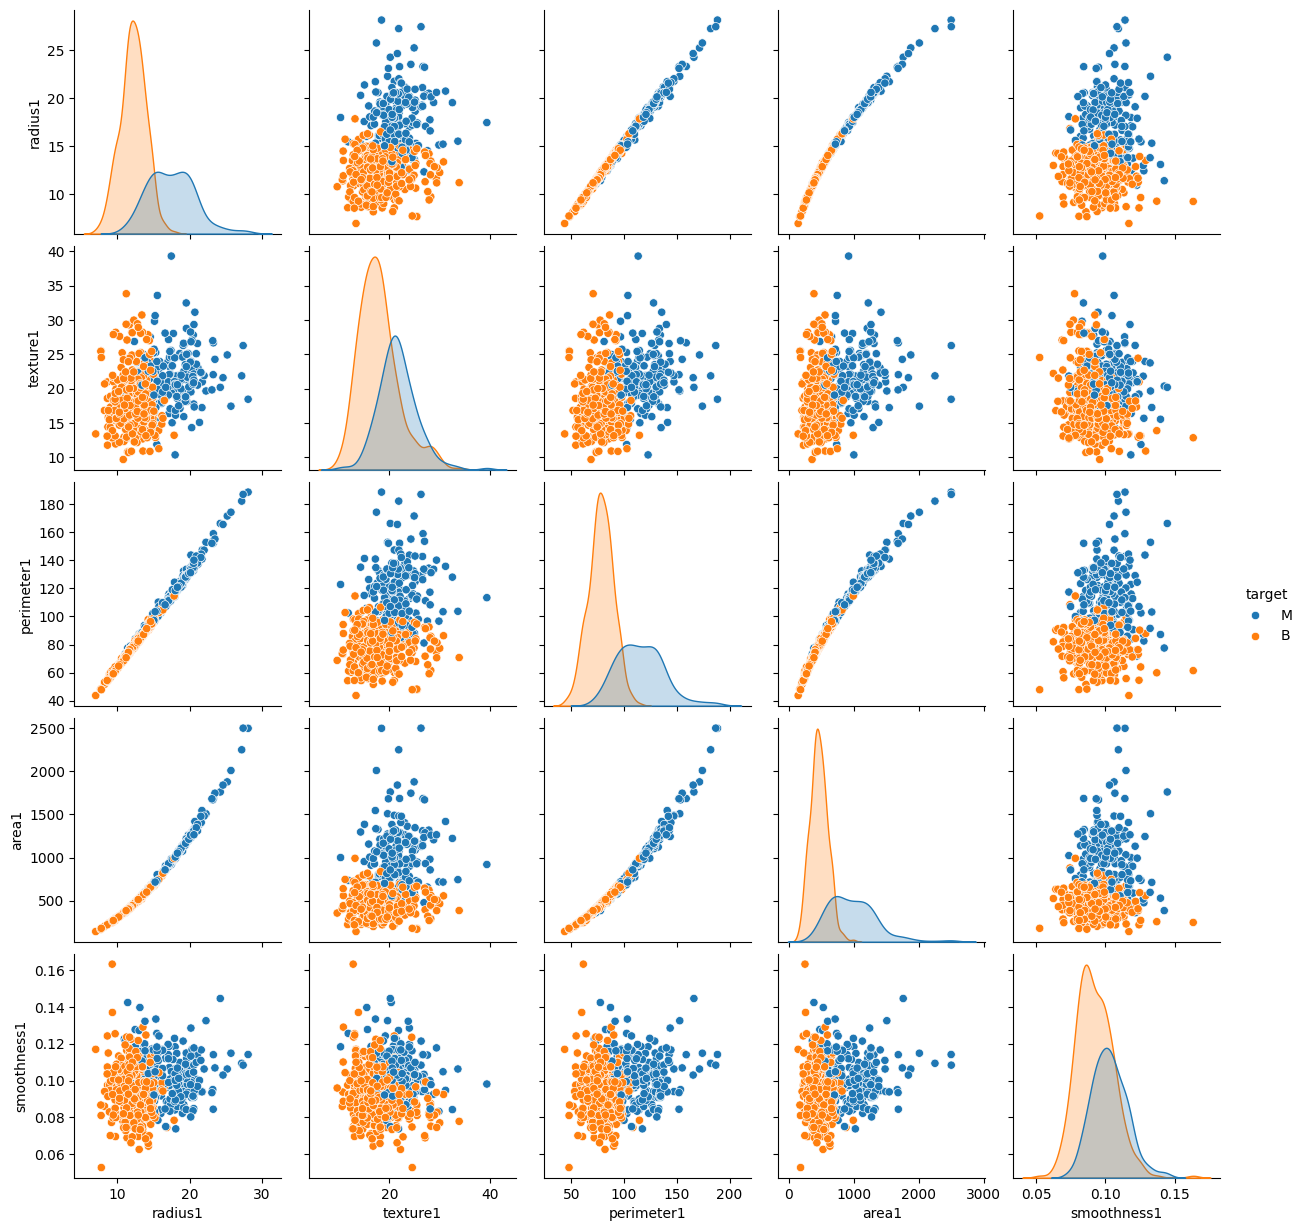

In [ ]:
print(df.describe())
print(df['target'].value_counts())

sns.pairplot(df[['radius1','texture1','perimeter1','area1','smoothness1','target']], hue='target')
plt.show()


## 🔍 Data Preprocessing

- Selected two classes for binary classification
- Standardized features using StandardScaler
- Split dataset into 80% training and 20% testing


### 3. Data Preprocessing

In [21]:
from sklearn.preprocessing import LabelEncoder

X = df.drop('target', axis=1).values
y = df['target'].values

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## 🧠 Model Training

Logistic Regression estimates the probability of class membership using:

P(y=1|x) = 1 / (1 + e^(-wx))

The model is trained using maximum likelihood optimization.


### 4. Model Training

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, alpha=0.0001, solver='adam', random_state=42, verbose=True)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)


Iteration 1, loss = 0.94773807
Iteration 2, loss = 0.77666963
Iteration 3, loss = 0.63945877
Iteration 4, loss = 0.53089365
Iteration 5, loss = 0.45000048
Iteration 6, loss = 0.38623919
Iteration 7, loss = 0.34021897
Iteration 8, loss = 0.30250070
Iteration 9, loss = 0.27326688
Iteration 10, loss = 0.24984229
Iteration 11, loss = 0.23077880
Iteration 12, loss = 0.21515777
Iteration 13, loss = 0.20164243
Iteration 14, loss = 0.19066322
Iteration 15, loss = 0.18095789
Iteration 16, loss = 0.17242191
Iteration 17, loss = 0.16502149
Iteration 18, loss = 0.15829020
Iteration 19, loss = 0.15225020
Iteration 20, loss = 0.14689051
Iteration 21, loss = 0.14189562
Iteration 22, loss = 0.13722388
Iteration 23, loss = 0.13290459
Iteration 24, loss = 0.12898051
Iteration 25, loss = 0.12523562
Iteration 26, loss = 0.12196897
Iteration 27, loss = 0.11866048
Iteration 28, loss = 0.11570267
Iteration 29, loss = 0.11284218
Iteration 30, loss = 0.11011776
Iteration 31, loss = 0.10763591
Iteration 32, los

### 5. Model Evaluation

Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           B       0.97      0.97      0.97        71
           M       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



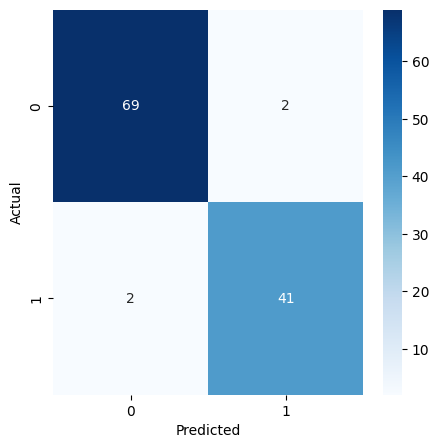

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## 🔎 Model Interpretation

The learned coefficients indicate feature importance.

Higher absolute coefficient values imply stronger influence on classification.


### 6. Model Interpretation

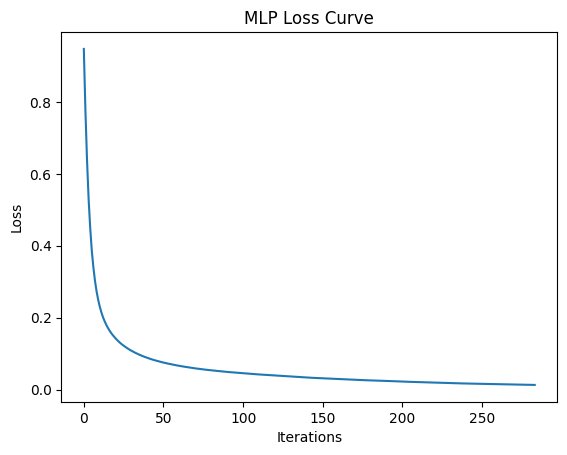

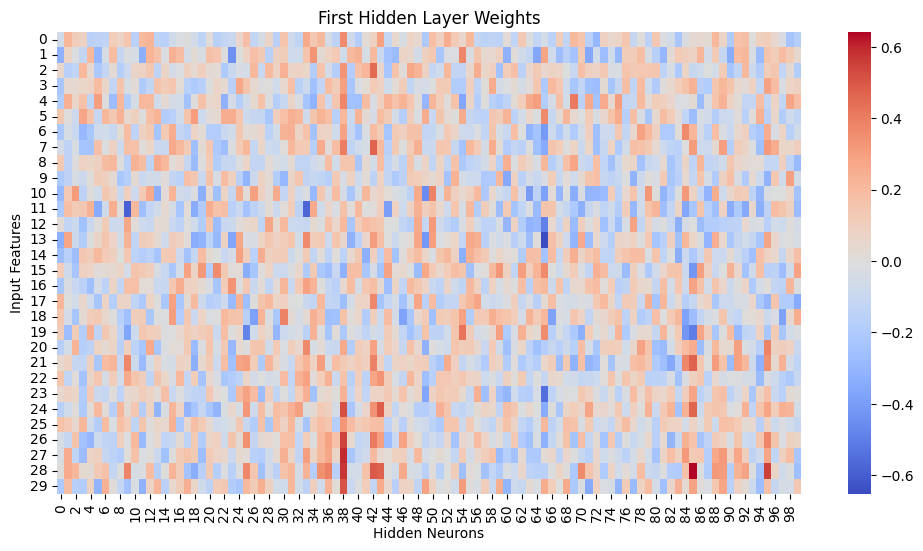

In [ ]:
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('MLP Loss Curve')
plt.show()

weights = mlp.coefs_[0]
plt.figure(figsize=(12,6))
sns.heatmap(weights, cmap='coolwarm')
plt.xlabel('Hidden Neurons')
plt.ylabel('Input Features')
plt.title('First Hidden Layer Weights')
plt.show()


### 7. Hyperparameter Tuning

{'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'solver': 'adam'}
0.9450447310328802
Accuracy: 0.9824561403508771
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



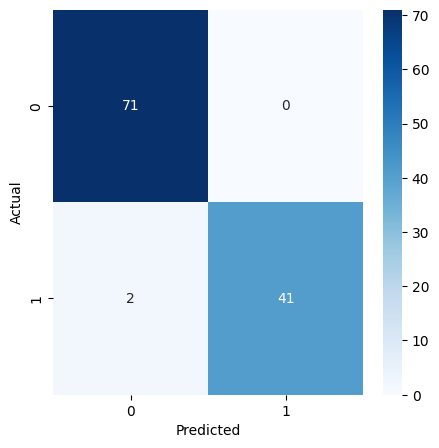

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100,50)],
    'alpha': [0.0001, 0.001, 0.01],
    'solver': ['adam', 'sgd']
}

grid_search = GridSearchCV(MLPClassifier(max_iter=1000, random_state=42, early_stopping=True), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### 8. Exercises

Exercise 1: Experiment with Different Architectures

In [ ]:
architectures = [(50,), (100,50), (50,25,10)]

for arch in architectures:
    model = MLPClassifier(hidden_layer_sizes=arch, max_iter=1000, random_state=42, early_stopping=True)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(arch, accuracy_score(y_test, y_pred))


(50,) 0.9385964912280702
(100, 50) 0.9824561403508771
(50, 25, 10) 0.956140350877193


Exercise 2: Analyze the Impact of Regularization

In [ ]:
alphas = [0.0001, 0.001, 0.01]

for a in alphas:
    model = MLPClassifier(hidden_layer_sizes=(100,), alpha=a, max_iter=300, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(a, accuracy_score(y_test, y_pred))


0.0001 0.9649122807017544
0.001 0.9649122807017544
0.01 0.9649122807017544


Exercise 3: Compare Different Solvers

In [ ]:
solvers = ['adam', 'sgd', 'lbfgs']

for s in solvers:
    model = MLPClassifier(hidden_layer_sizes=(100,), solver=s, max_iter=1000, random_state=42, early_stopping=True)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(s, accuracy_score(y_test, y_pred))


adam 0.9649122807017544
sgd 0.9385964912280702
lbfgs 0.956140350877193


## ✅ Conclusion

Logistic Regression successfully classified the Iris dataset with high accuracy.

The experiment demonstrates:
- Effectiveness of linear models on separable data
- Importance of feature scaling
- Interpretability of linear classifiers

This project reinforces understanding of probabilistic classification.
